<a href="https://colab.research.google.com/github/ebatty/MathTools2023/blob/jupyterbook/Week4/Week4Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 2

**Dynamical Systems II: Continuous Dynamical Systems and Differential Equations**

**[insert your name]**

**Important reminders**: Before starting, click "File -> Save a copy in Drive". Produce a pdf for submission by "File -> Print" and then choose "Save to PDF".




 Imports


In [1]:
# @markdown Imports

# Imports
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets  # interactive display
from scipy import optimize as opt

 Helper functions


In [2]:
# @markdown Helper functions
import numpy
from numpy.linalg import inv, eig
from math import ceil
from matplotlib import pyplot, ticker, get_backend, rc
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle


%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

classic = 'k'



# Introducing the FitzHugh-Nagumo Model

We will be working with a neuron model today which is defined by a system of nonlinear differential equations. This model, the FitzHugh-Nagumo model, is similar in flavor to the better known Hodgkin-Huxley model, but is easier to analyze because it consists of two differential equations while the Hodgkin-Huxley model consists of four.  We will define the model as:

$$\begin{align}
\frac{dV}{dt} &= V - V^3 - w + I \\
\frac{dw}{dt} &= 0.1(V - 0.5w + 1)\\
\end{align}
$$

I saw that we will define it this way as this is slightly different (less constants) than other implementations you will see. $V$ here is the voltage of the neuron (without units, don't expect to equate to reality in mV) and $I$ is the input current. $w$ doesn't have a strict biological equivalent but it represents a recovery variable (as in, it helps the voltage recover after an action potential).

# Exercise 1: Finding nullclines & equilibrium points

Nullclines are curves in the phase plane space (w vs V) where one of the derivatives equals 0. The equilibrium points will occur at the intersections of the nullclines.



## A) Plotting the nullclines

Complete the function below to plot the nullclines on w vs V space (so we'll plot them as a function of V). We will want to vary I later so keep it general.

Hint: define both nullclines as w = ... since we're plotting as a function of V

ValueError: ignored

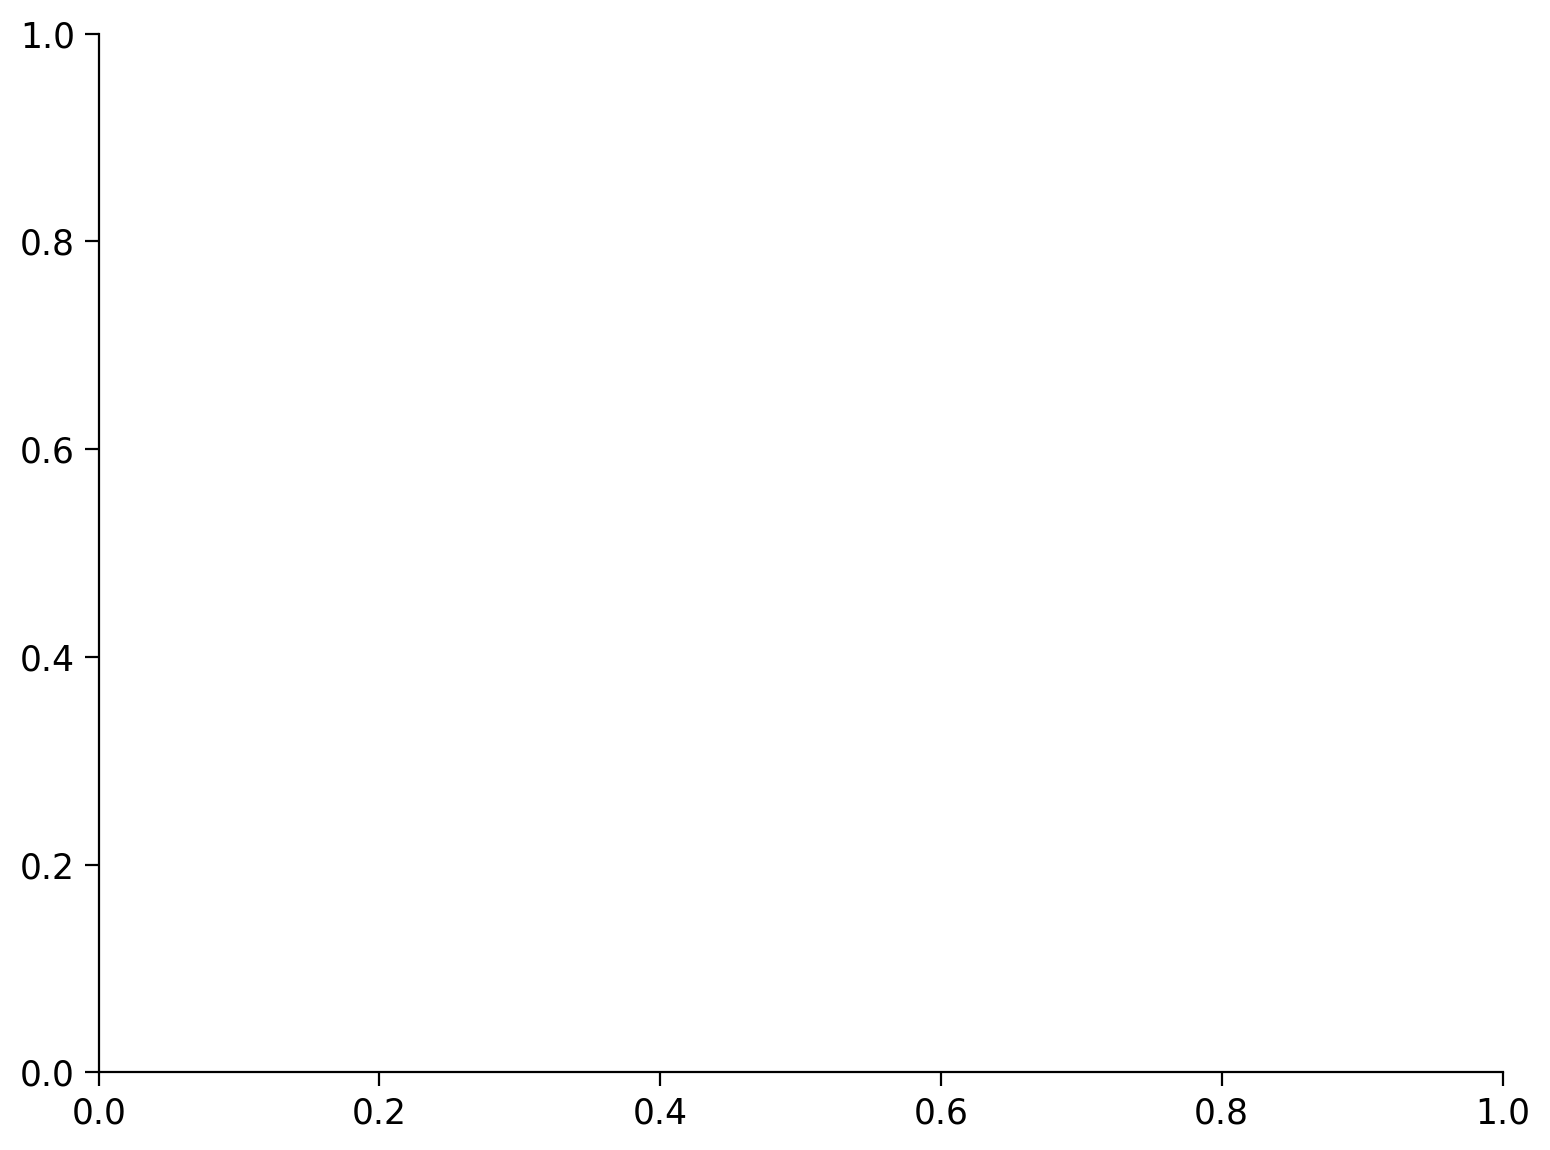

In [3]:
def plot_nullclines(I, ax):

    # Range of V we want to look at
    V = np.arange(-2, 2, .01)

    # Plot a nullcline for dV/dt = 0
    ax.plot(V, ..., 'b', label='dV/dt=0')

    # Plot a nullcline for dw/dt = 0
    ax.plot(V, ..., 'g', label='dw/dt=0')

    ax.set(xlabel='V', ylabel='w');
    ax.legend()

fig, ax = plt.subplots()
plot_nullclines(I=1, ax=ax)

Try different values of I to make the nullcline plot. What do you notice about the intersection of the nullclines with larger I?

### Answer

<font color='green'><span style="font-size:larger;">
Fill in your text answer here so it is green. Use <br> <br>  for line breaks
</font> </span>

## Finding the equilibrium points

We can see from the plot above that there is one fixed point. Instead of finding this analytically, which is a bit annoying, we'll use the magic of computers. Specifically, we'll use `scipy.optimize.fsolve`. This function finds the roots (where an equation or set of equations equals 0) by numerical methods. It needs an initial guess, or starting estimate, in the neighborhood of the fixed point to work well. The initial guess doesn't have to be very exact though - in fact we'll use the same initial guess for every I.


I give you the code to compute the fixed point below.

In [4]:
def diff_eqs(x, I):
    V, w = x
    return [V - V**3 - w + I, .1*(V - 0.5*w+1)]

def get_fixed_point(I):
  initial_guess = [-1, -1]
  fixed_point = opt.fsolve(diff_eqs, initial_guess, I)
  return fixed_point

V_fp, w_fp = get_fixed_point(I=0)
print(V_fp)
print(w_fp)

-0.9999999999999999
-8.933825777203465e-17


# Exercise 2: Analyzing dynamics with zero current

We want to look at what happens in our system when I=0 (zero external current). Take a second and think - from a neuroscience perspective, what would you predict would happen? How would V evolve from some initial condition?

## A) Linearization of the fixed point

We are going to look at a linearization around the fixed point, or the dynamics of an associated homogeneous system at that point. To do this, we compute the Jacobian (the matrix of partial derivatives) and analyze the eigenvalues of the Jacobian at that fixed point. We can classify the fixed point based on those eigenvalues according to how they govern the dynamics of a homogenous system $ \frac{dX}{dt} = Jx$.


We first need to compute the Jacobian for the system as a whole. We will then plug in the fixed point at I=0 to get the Jacobian at that fixed point. I tell you what the Jacobian is in the hidden cell below but you are welcome to not look and derive it yourself if you have the time!

 Look at this cell for the Jacobian


In [ ]:
# @markdown Look at this cell for the Jacobian

# V_fp is the voltage at the fixed point
# J = np.array([[1-3*V_fp**2, -1], [0.1, -0.05]])

Plug in the voltage at the fixed point into the Jacobian when I=0 (find with `get_fixed_point`) and get the eigenvalues of the resulting matrix.

In [ ]:
V_fp = ...
J = ...
# Get eigvals
...

## B) Classifying the fixed point

Based on the eigenvalues of the Jacobian when I=0, how would you classify the fixed point? Why? What do you expect the trajectory from any initial point to look like?


Look at Video 5.3 at 24:05 for classifications with real, distinct eigenvalues, 27:03 for complex eigenvalues, and 28:29 for repeated eigenvalues.

<font color='green'><span style="font-size:larger;">
Fill in your text answer here so it is green. Use <br> <br>  for line breaks
</font> </span>

## C) Plotting trajectories

I have implemented a Euler integration method for this model, `fitzhugh_nagumo_euler` below. It takes inputs init_V, init_w, and I.

Pick three different initial conditions that are within the bounds of the plot. For each, plot the trajectory of the dynamical system in phase plane space. Make the initial condition of the trajectory a circle marker.


 Click here to see helper function fitzhugh_nagumo_euler


In [ ]:
# @markdown Click here to see helper function fitzhugh_nagumo_euler
def fitzhugh_nagumo_euler(init_V, init_w, I, dt=0.01, T=100):

    # Initialize variables
    t = np.arange(0, T, dt)
    V = np.zeros_like(t)
    V[0] = init_V

    w = np.zeros_like(t)
    w[0] = init_w

    # Step through time
    for n in range(0, len(t)-1):

      dV_dt = V[n] - V[n]**3 - w[n] + I
      dw_dt = 0.1*(V[n] -0.5*w[n]+1)

      V[n+1] = V[n] + dV_dt *dt
      w[n+1] = w[n] + dw_dt *dt

    return V, w, t

ValueError: ignored

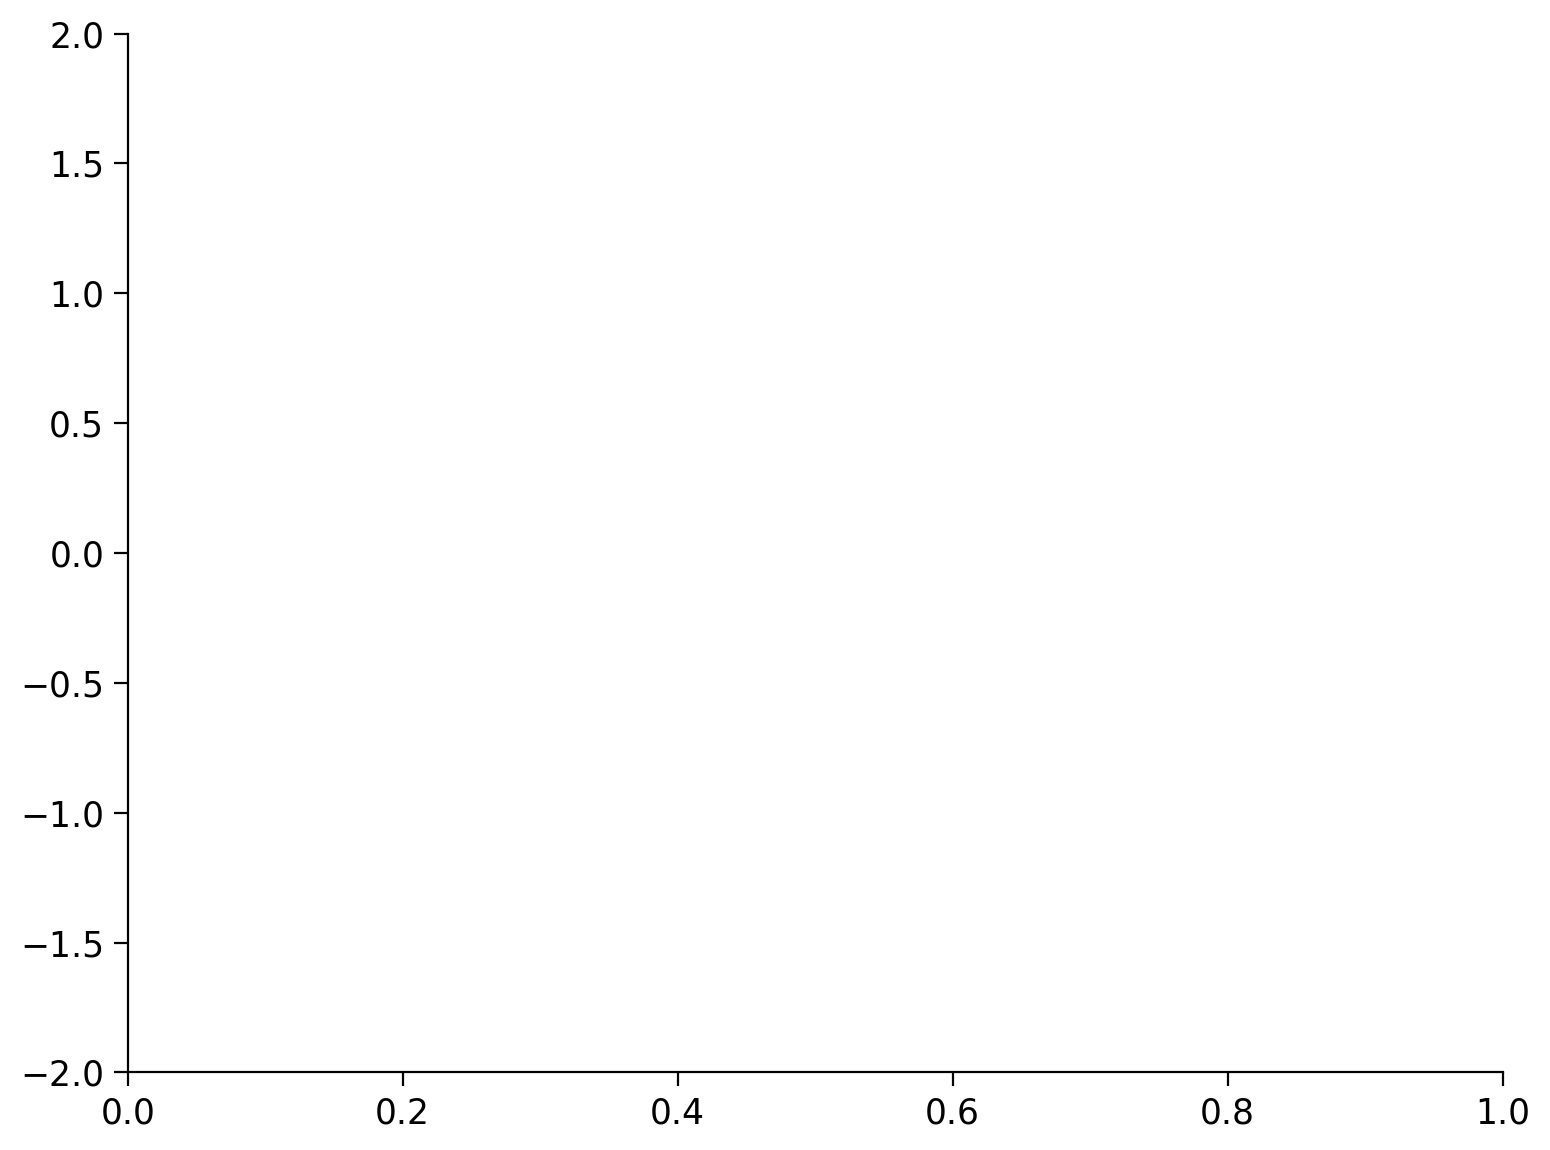

In [6]:
I=0

fig, ax = plt.subplots()
ax.set_ylim([-2, 2])
plot_nullclines(I, ax=ax)

# Plot trajectories here

# V, w, t = fitzhugh_nagumo_euler(init_V, init_W, I)



Plot V over time for one of the initial conditions.

In [ ]:
# your code here

How is what you're seeing consistant with your analysis of the fixed point?


**Your answer here**

# Exercise 3: Analyzing dynamics with some current

We will repeat the steps of Exercise 2 but now we will look at different I.

## A) I = 1

We compute the eigenvalues of the Jacobian for the fixed point when I = 1. What dynamic around the fixed point would you expect? Why?



In [7]:
V_fp, w_fp = get_fixed_point(I=1)
J = np.array([[1-3*V_fp**2, -1], [0.1, -0.05]])

# Get eigvals
np.linalg.eig(J)

(array([-0.22335685+0.26447571j, -0.22335685-0.26447571j]),
 array([[ 0.95346259+0.j       ,  0.95346259-0.j       ],
        [-0.16528927-0.2521677j, -0.16528927+0.2521677j]]))

<font color='green'><span style="font-size:larger;">
Fill in your text answer here so it is green. Use <br> <br>  for line breaks
</font> </span>

## B) I = 1.5

We compute the eigenvalues of the Jacobian for the fixed point when I = 1.5. What dynamic around the fixed point would you expect? Why?


In [ ]:
V_fp, w_fp = get_fixed_point(I=1)
J = np.array([[1-3*V_fp**2, -1], [0.1, -0.05]])

# Get eigvals
np.linalg.eig(J)

<font color='green'><span style="font-size:larger;">
Fill in your text answer here so it is green. Use <br> <br>  for line breaks
</font> </span>

## C) Interactive Demo

You can change I below to see the nullclines with the trajectory through phase plane space, and a plot of t vs V for the initial condition V = -2, w = -0.5.

i) What is happening (neuron-wise) when I=1?

ii) What is happening (neuron-wise) when I=1.5?


<font color='green'><span style="font-size:larger;">
Fill in your text answer here so it is green. Use <br> <br>  for line breaks
</font> </span>

 Execute this cell to enable widget


In [ ]:
# @markdown Execute this cell to enable widget

def plot_fitzhugh_nagumo(I):

  fig, axes = plt.subplots(1, 2)

  # Plot nullclines
  plot_nullclines(I, axes[0])

  # Plot a few trajectories
  init_conds = [[-2, -.5]]
  for init_cond in init_conds:
    V, w, t = fitzhugh_nagumo_euler(init_cond[0], init_cond[1], I)

    axes[0].plot(V[0], w[0], 'or')
    axes[0].plot(V, w, 'r')
  axes[0].set(xlabel='V', ylabel='w')

  axes[1].plot(t, V)
  axes[1].set(xlabel='Time', ylabel='Voltage')
  plt.show()

_ = widgets.interact(plot_fitzhugh_nagumo, I=(-1, 4, .01))

# Extra info

We've barely scratched the surface of examining this model. It can replicate lots of interesting phenomenon: http://www.scholarpedia.org/article/FitzHugh-Nagumo_model Explained phenomena section. Can you replicate some of those?
